In [71]:
library(ggplot2)
#library(texreg)
#library(tikzDevice)

setwd("~/Dropbox/College/DR_Paper/cafta-dr/Output/")
#setwd("D:/Dropbox/Dropbox (Personal)/College/DR_Paper/")

munoccdf <- read.csv("municipality_occupation_level_DATASET.csv")
hs6tariff <- read.csv("wtoandcaftahstariff.csv")

In [72]:
### CLean up HS6 level tariff data set
hs6tariff$chngtrf <- hs6tariff$duty2013-hs6tariff$X2002AvgRate
hs6tariff$lgchng <- log(-hs6tariff$chngtrf+1)
hs6tariff$lgdty02 <-log(hs6tariff$X2002AvgRate+1)

In [66]:
### Cleanup variables in municipality/occupation level dataset
munoccdf$mean=rowMeans(munoccdf[,c("incforocc13", "firstsourceofincome13",
                                  "totalhhincpercapita13","incpercapita13")],
                       na.rm=TRUE)
munoccdf$chnginc1 <- munoccdf$incforocc13-munoccdf$inc2002
munoccdf$chnginc2 <- munoccdf$firstsourceofincome13-munoccdf$inc2002
munoccdf$chnginc3 <- munoccdf$totalhhincpercapita13-munoccdf$inc2002
munoccdf$chnginc4 <- munoccdf$incpercapita13-munoccdf$inc2002
munoccdf$chnginc5 <- munoccdf$mean-munoccdf$inc2002
munoccdf$chngtrf <- munoccdf$duty13-munoccdf$duty02
munoccdf$lgchng <- log(-munoccdf$chngtrf+1)
munoccdf$lgdty02 <-log(munoccdf$duty02+1)
munoccdf$chngwrk <- munoccdf$numworkers10-munoccdf$numworkers02
munoccdf$occ <- factor(munoccdf$occ)

In [23]:
#colnames(hs6tariff)
#plot(hs6tariff$X2002AvgRate,hs6tariff$chngtrf)

bf <- lm(hs6tariff$chngtrf~hs6tariff$X2002AvgRate)
#summary(bf)

In [67]:
## Plot tariff level in 2002 compared to tariff change
p1 <- ggplot(munoccdf, aes(x=duty02, y=chngtrf)) +
  coord_equal() + geom_jitter(aes(colour=occ),size=.75) + #geom_point(shape=1) +
  #geom_text(aes(label=occ)) + # Could do this perhaps
  ggtitle("Tariff Changes 2002-2013 based on Pre-CAFTA Tariff Levels
  (ISIC 2 digit)") + geom_smooth(method=lm)+ 
  xlab("2002 pre-CAFTA duty") + ylab("Decrease in duty rate") +
  theme_classic()
#tikz(file='../Plots/caftanonlog.tex',standAlone=TRUE,sanitize=TRUE) 
#print(p1)
#dev.off()
#p1
ggsave(filename="tariffdecrisic.png", plot=p1, path="../Plots/", width=8, height=8)

In [77]:
## Do same as above but at HS6 level
p2 <- ggplot(hs6tariff, aes(x=X2002AvgRate, y=chngtrf))+
  coord_equal() + geom_point(shape=1) +
  ggtitle("Tariff Changes 2002-2013 based on Pre-CAFTA Tariff Levels (HS6 Code)") +
  geom_smooth(method=lm)+
  xlab("2002 pre-CAFTA duty") + ylab("Decrease in duty rate") +
  theme_classic()
#p2
ggsave(filename="tariffdecrhs6.png", plot=p2, path="../Plots/", width=8, height=8)

Warning message:
: Removed 30 rows containing non-finite values (stat_smooth).Warning message:
: Removed 30 rows containing missing values (geom_point).

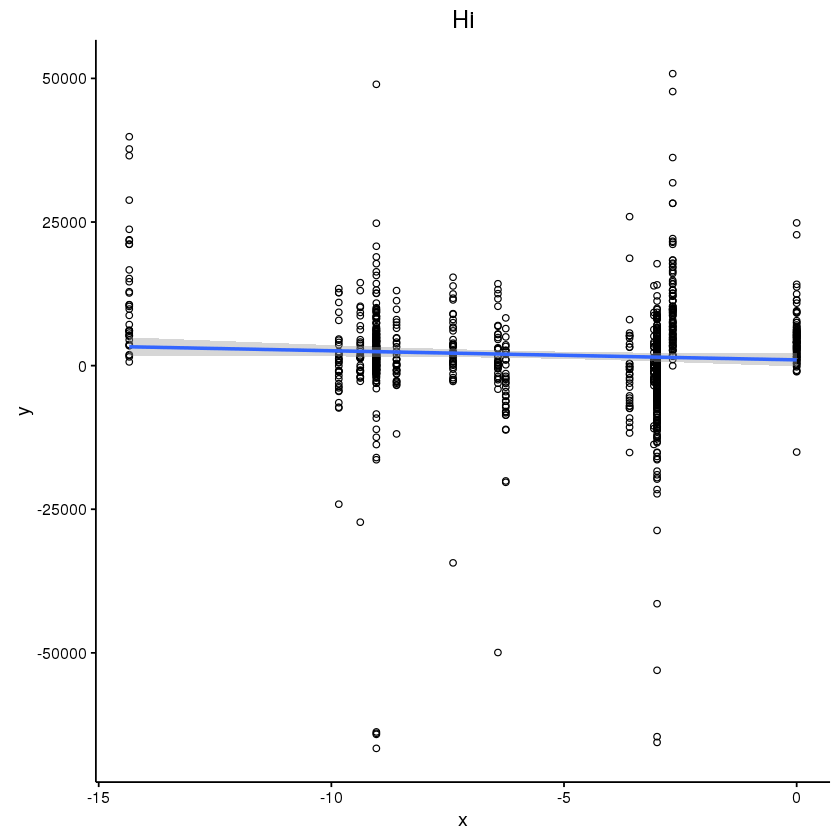

In [41]:
p3 <- ggplot(munoccdf, aes(x=chngtrf, y=chnginc3)) +
  #coord_equal() + 
  #geom_jitter(aes(colour=occ),size=.75) + 
  geom_point(shape=1) +
  #geom_text(aes(label=occ)) + # Could do this perhaps
  ggtitle("Hi") + geom_smooth(method=lm)+ 
  xlab("x") + ylab("y") +
  theme_classic()
p3